In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import EvolutionStrategy as EvosStrat
importlib.reload(EvosStrat)
EvolutionStrategyClass = EvosStrat.EvolutionStrategy
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [20]:
parent_loc = "./Evolution_stratergy_parameter_search/stored_data/"
os.listdir(parent_loc)

['many_dim1610781388.5753894.pkl',
 'many_dim1610782745.0565243.pkl',
 'many_dim1610782821.5583565.pkl',
 'param_find1610649147.5987375.pkl',
 'param_find1610834769.2748628.pkl',
 'param_find1610871792.7808535.pkl',
 'Rosenbrockmany_dim1610815609.7251613.pkl',
 'Rosenbrockmany_dim1610815760.4354157.pkl',
 'Rosenbrockmany_dim1610815859.9033656.pkl']

In [21]:
file = 'param_find1610871792.7808535.pkl'#os.listdir(parent_loc)[-1]

In [22]:
result_list = pickle.load(open(parent_loc + file, "rb"))

In [23]:
results_df = pd.DataFrame()
for result in result_list:
    results_df = results_df.append(result, ignore_index=True)
results_df.head()

,average_runtime,best_performance,best_performance_final,bound_enforcing_method,child_to_parent_ratio,mean_performance,mean_performance_final,mutation_covariance_initialisation_fraction_of_range,mutation_method,objective_function,parent_number,raw_results,selection_method,standard_deviation_clipping_fraction_of_range,std_perormance,std_perormance_final,termination_min_abs_difference,x_bounds,x_length
0,6.937799,-1633.129303,-1210.666034,not_clipping,2.0,-1464.511137,-823.513412,0.01,complex,<function rana_func at 0x000001C42EBA8EE0>,10.0,"[-1384.0941841169779, -1338.4497708299843, -14...",standard_mew_comma_lambda,0.01,94.358914,216.960037,0.000001,"(-500, 500)",5.0
1,1.387261,-1657.872887,-1655.956512,not_clipping,2.0,-1344.216723,-1335.557826,0.01,diagonal,<function rana_func at 0x000001C42EBA8EE0>,10.0,"[-1345.1173315444157, -1582.4971243317902, -14...",standard_mew_comma_lambda,0.01,210.572377,215.934633,0.000001,"(-500, 500)",5.0
2,1.318361,-1744.529060,-1664.651959,not_clipping,2.0,-1373.571276,-1242.418606,0.01,simple,<function rana_func at 0x000001C42EBA8EE0>,10.0,"[-1341.4468540541493, -1597.5752487283578, -14...",standard_mew_comma_lambda,0.01,166.074019,181.844635,0.000001,"(-500, 500)",5.0
3,7.000888,-1709.055793,-1586.789696,not_clipping,3.0,-1535.266808,-1133.981281,0.01,complex,<function rana_func at 0x000001C42EBA8EE0>,6.0,"[-1521.3672281866207, -1458.4133579100935, -15...",standard_mew_comma_lambda,0.01,76.064544,281.829986,0.000001,"(-500, 500)",5.0
4,0.836027,-1695.438770,-1695.438765,not_clipping,3.0,-1384.788091,-1384.458260,0.01,diagonal,<function rana_func at 0x000001C42EBA8EE0>,6.0,"[-1429.15501544062, -1576.6502320205127, -1475...",standard_mew_comma_lambda,0.01,230.695863,231.143146,0.000001,"(-500, 500)",5.0


In [24]:
results_df.columns, results_df.shape

(Index(['average_runtime', 'best_performance', 'best_performance_final',
        'bound_enforcing_method', 'child_to_parent_ratio', 'mean_performance',
        'mean_performance_final',
        'mutation_covariance_initialisation_fraction_of_range',
        'mutation_method', 'objective_function', 'parent_number', 'raw_results',
        'selection_method', 'standard_deviation_clipping_fraction_of_range',
        'std_perormance', 'std_perormance_final',
        'termination_min_abs_difference', 'x_bounds', 'x_length'],
       dtype='object'),
 (2280, 19))

In [25]:
output_names = ['average_runtime','best_performance', 'best_performance_final', 'child_to_parent_ratio', 'mean_performance',
       'mean_performance_final','mutation_method', 'parent_number',
       'selection_method','std_perormance_final']

In [69]:
def get_best_values_and_return_dict(spec_names, spec_vals, output_names=output_names):
    df = results_df
    for spec_name, spec_val in zip(spec_names, spec_vals):
        df = df.loc[results_df[spec_name] == spec_val]
    argmin_indx = df["mean_performance_final"].argmin()
    output_dict = {}
    for output_name in output_names:
        output_dict[output_name] = df.iloc[argmin_indx][output_name]
    return output_dict

In [70]:
results_df['mutation_method'].unique()

array(['complex', 'diagonal', 'simple'], dtype=object)

In [76]:
report_table = pd.DataFrame()
for mutation_method in ['complex', 'diagonal', 'simple']:
    for selection_method in ['standard_mew_comma_lambda', "elitist"]:
        spec_names = ["mutation_method", "selection_method"] 
        spec_vals = [mutation_method, selection_method]
        output_dict = get_best_values_and_return_dict(spec_names, spec_vals)
        report_table = report_table.append(output_dict, ignore_index=True)
report_table

,average_runtime,best_performance,best_performance_final,child_to_parent_ratio,mean_performance,mean_performance_final,mutation_method,parent_number,selection_method,std_perormance_final
0,7.146411,-1901.765674,-1901.756887,13.0,-1698.546614,-1660.273248,complex,5.0,standard_mew_comma_lambda,107.946790
1,10.030094,-1831.178289,-1831.178289,9.0,-1761.650906,-1761.650906,complex,13.0,elitist,53.436539
2,1.137733,-1928.796191,-1928.796191,12.0,-1877.111506,-1873.795809,diagonal,41.0,standard_mew_comma_lambda,38.377981
3,1.145411,-1943.614994,-1943.614994,8.0,-1893.854953,-1893.854953,diagonal,59.0,elitist,29.490643
4,1.100708,-1955.148931,-1955.148931,18.0,-1850.275950,-1829.800512,simple,27.0,standard_mew_comma_lambda,53.677512
5,1.115779,-1917.807892,-1917.807892,10.0,-1874.886100,-1874.886100,simple,44.0,elitist,28.616067


In [77]:
report_table["number of offspring"] = report_table['child_to_parent_ratio'] * report_table['parent_number']

In [78]:
column_order = ["mutation_method", "selection_method",'child_to_parent_ratio', "number of offspring",'parent_number', "mean_performance_final", 
                "std_perormance_final", "average_runtime"] # "mean_performance" # "best_performance_final"
report_table = report_table[column_order]
rename_dict = {"mutation_method": "mutation method", 
               "mean_performance_final": "mean f(x)", 
               "std_perormance_final": "std dev f(x)", 
               "average_runtime": "average runtime (s)",
               'child_to_parent_ratio' : "Offspring per parent",
               'parent_number' : 'parent number',
               "selection_method": "selection method",
}
#               "mean_performance": "mean best objective (within run)", 
#               "best_performance_final": "best final performance (across seeds)", 

report_table = report_table.rename(columns = rename_dict)
report_table = report_table.round(2)
report_table

,mutation method,selection method,Offspring per parent,number of offspring,parent number,mean final performance,std dev final performance,average runtime (s)
0,complex,standard_mew_comma_lambda,13.0,65.0,5.0,-1660.27,107.95,7.15
1,complex,elitist,9.0,117.0,13.0,-1761.65,53.44,10.03
2,diagonal,standard_mew_comma_lambda,12.0,492.0,41.0,-1873.80,38.38,1.14
3,diagonal,elitist,8.0,472.0,59.0,-1893.85,29.49,1.15
4,simple,standard_mew_comma_lambda,18.0,486.0,27.0,-1829.80,53.68,1.10
5,simple,elitist,10.0,440.0,44.0,-1874.89,28.62,1.12


In [79]:
report_table.T.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n      <th>2</th>\n      <th>3</th>\n      <th>4</th>\n      <th>5</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>mutation method</th>\n      <td>complex</td>\n      <td>complex</td>\n      <td>diagonal</td>\n      <td>diagonal</td>\n      <td>simple</td>\n      <td>simple</td>\n    </tr>\n    <tr>\n      <th>selection method</th>\n      <td>standard_mew_comma_lambda</td>\n      <td>elitist</td>\n      <td>standard_mew_comma_lambda</td>\n      <td>elitist</td>\n      <td>standard_mew_comma_lambda</td>\n      <td>elitist</td>\n    </tr>\n    <tr>\n      <th>Offspring per parent</th>\n      <td>13</td>\n      <td>9</td>\n      <td>12</td>\n      <td>8</td>\n      <td>18</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>number of offspring</th>\n      <td>65</td>\n      <td>117</td>\n      <td>492</td>\n      <td>472</td>\n      <td>

In [61]:
selection_method = "standard_mew_comma_lambda"
mutation_method = "complex"

In [62]:
df = results_df.loc[(results_df["selection_method"] == selection_method) & (results_df["mutation_method"] == mutation_method)]

have to enter these value manually

In [63]:
len(np.unique(child_to_parent_ratio_data))

19

In [64]:
parent_data = df["parent_number"].to_numpy()
child_to_parent_ratio_data = df["child_to_parent_ratio"].to_numpy()
offspring_data = parent_data * child_to_parent_ratio_data
#offspring_data[0:3], parent_data[0:3], child_to_parent_ratio_data[0:3]

In [65]:
parent_number_n = 20 #df["parent_number"].unique().shape[0] 
child_to_parent_ratio_n = len(np.unique(child_to_parent_ratio_data))
parent_number_n, child_to_parent_ratio_n

(20, 19)

In [66]:
x1 = child_to_parent_ratio_data.reshape(parent_number_n,child_to_parent_ratio_n)
x2 = offspring_data.reshape(parent_number_n, child_to_parent_ratio_n)
#z = df[column].reshape(parent_number_n,child_to_parent_ratio_n)

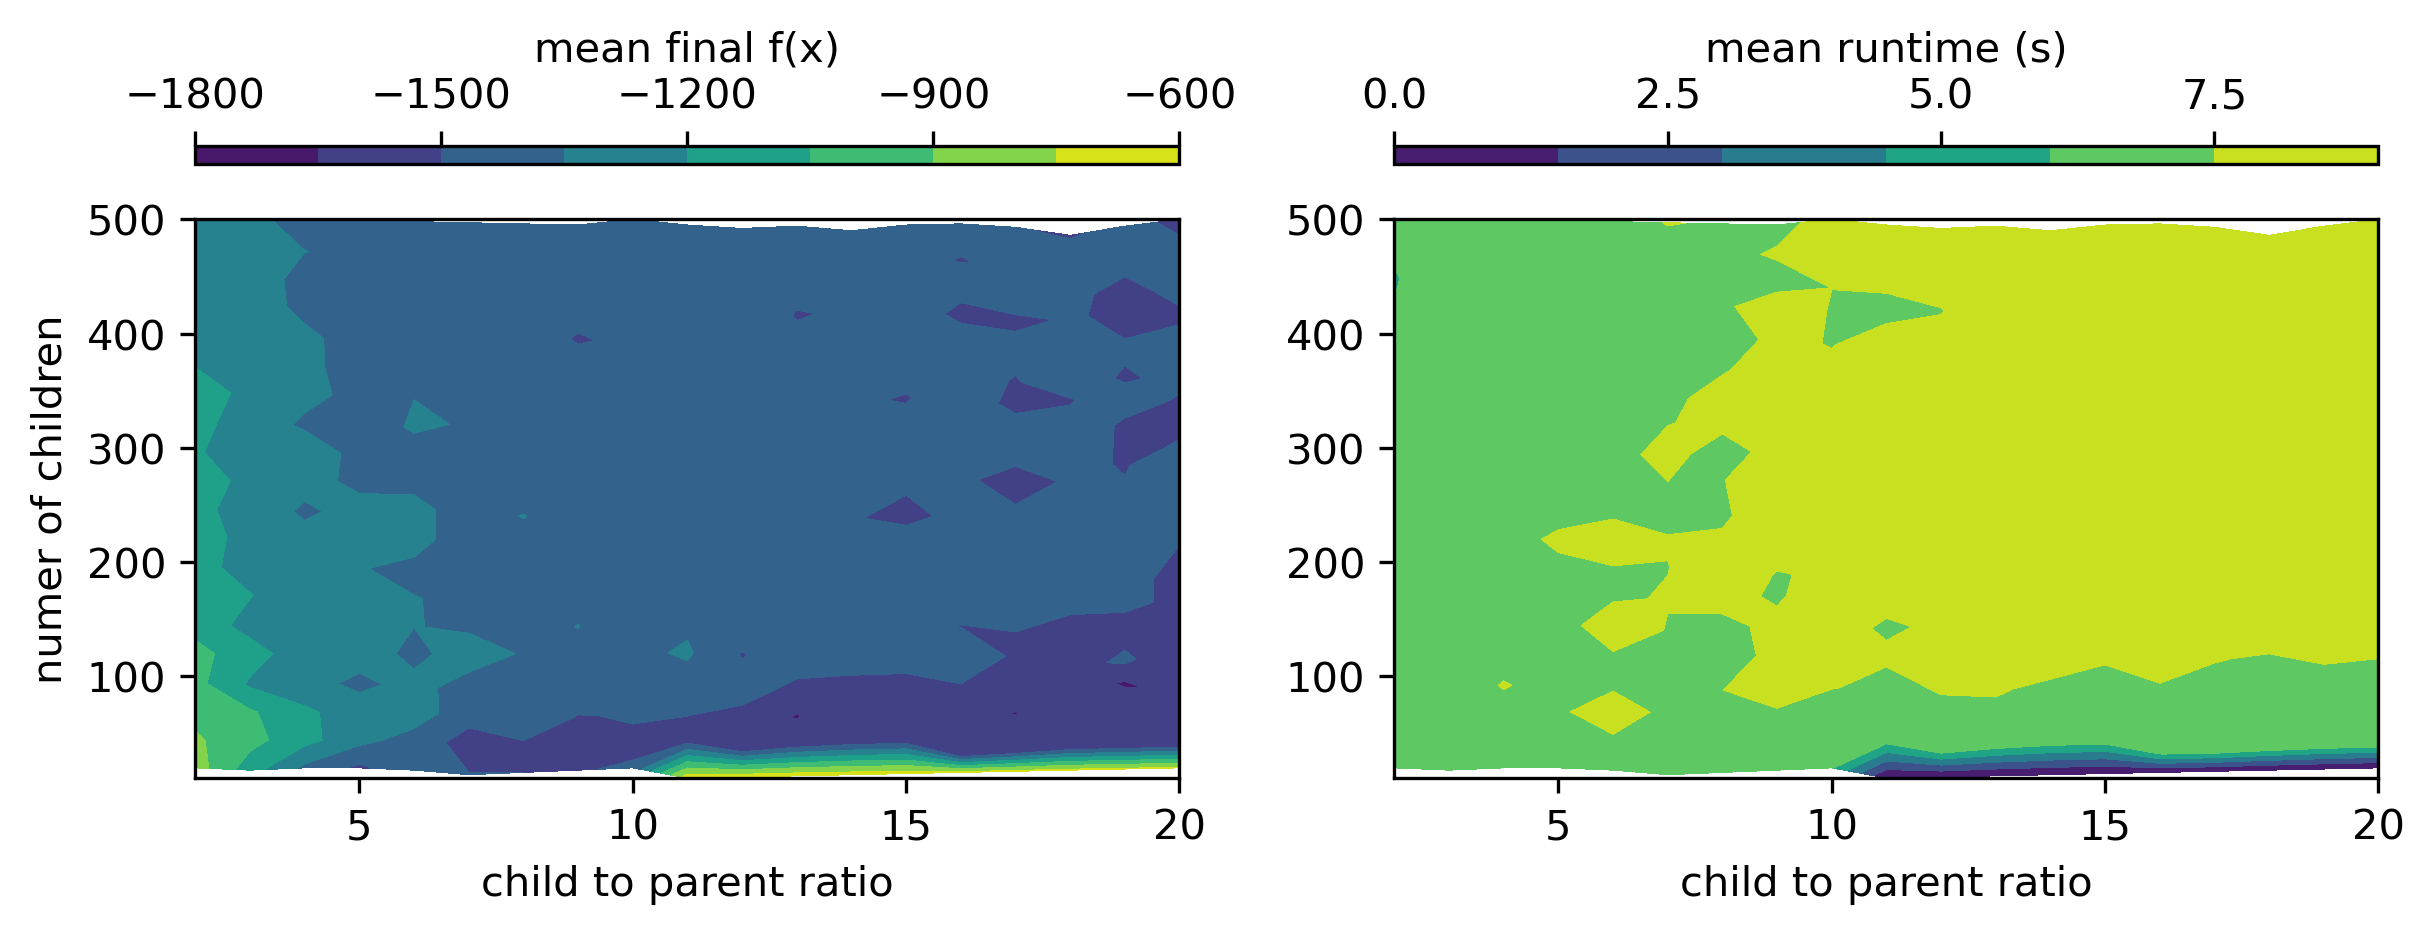

In [67]:
fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
#labels = ["final f(x)", "std f(x)", "time (s)"]
#for i, column in enumerate(["best_performance_final",'std_perormance_final', "average_runtime"]):
labels = ["mean final f(x)", "mean runtime (s)"]
for i, column in enumerate(["mean_performance_final", "average_runtime"]):
    z = df[column].to_numpy().reshape(parent_number_n,child_to_parent_ratio_n)
    plot_list = []
    cs = ax[i].contourf(x1,x2,z)
    CB = fig.colorbar(cs, label=labels[i], ax=ax[i], location='top')
    tick_locator = mpl.ticker.MaxNLocator(nbins=4)
    CB.locator = tick_locator
    CB.update_ticks()

ax[0].set_ylabel("numer of children")
#ax[1].set_ylabel("Max MC length")
ax[0].set_xlabel("child to parent ratio")
ax[1].set_xlabel("child to parent ratio")
#fig.tight_layout()
fig.savefig("./Figures/ES_offsring_n_OP_ratio_complex_mutation_mew_comma_lambda_selection.png")